In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

import semua library yang dibutuhkan

In [2]:
pip install kagglehub


install kagglehub agar bisa memuat data dari kaggle, karena disini saya menggunakan data dari kaggle

In [3]:
import kagglehub
import pandas as pd
import os

# Download dataset
path = kagglehub.dataset_download("bharath011/heart-disease-classification-dataset")
print("Path to dataset files:", path)
csv_path = os.path.join(path, 'Heart Attack.csv')
data = pd.read_csv(csv_path)

print("\nInformasi Dataset:")
print("Jumlah Baris (Data):", len(data))
print("Jumlah Kolom (Fitur):", len(data.columns))

print("\nInfo Detil Dataset:")
print(data.info())

print("\nRingkasan Statistik:")
print(data.describe())

100%|██████████| 15.8k/15.8k [00:00<00:00, 22.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bharath011/heart-disease-classification-dataset/versions/2

Informasi Dataset:
Jumlah Baris (Data): 1319
Jumlah Kolom (Fitur): 9

Info Detil Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None

Ringkasan Statistik:
               age       gender      impluse  pressurehight  pressurelow  \
count  1319.000000 

download semua data yang dibutuhkan, lalu melihat tipe tipe dataset pada setiap fitur serta ringkasan statsitik untuk memudahkan dalam EDA

##Data Exploration

In [4]:
# Melihat informasi tentang dataset
print(data.info())

# Melihat ringkasan statistik
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None
               age       gender      impluse  pressurehight  pressurelow  \
count  1319.000000  1319.000000  1319.000000    1319.000000  1319.000000   
mean     56.191812     0.659591    78.336619     127.170584    72.269143   
std      13.647315     0.474027    51.630270      26.122720    14.033924   
min      14.000000     0.000000    20.

melihat tipe tipe dataset pada setiap fitur serta ringkasan statsitik untuk memudahkan dalam EDA

#Data Preparation

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64


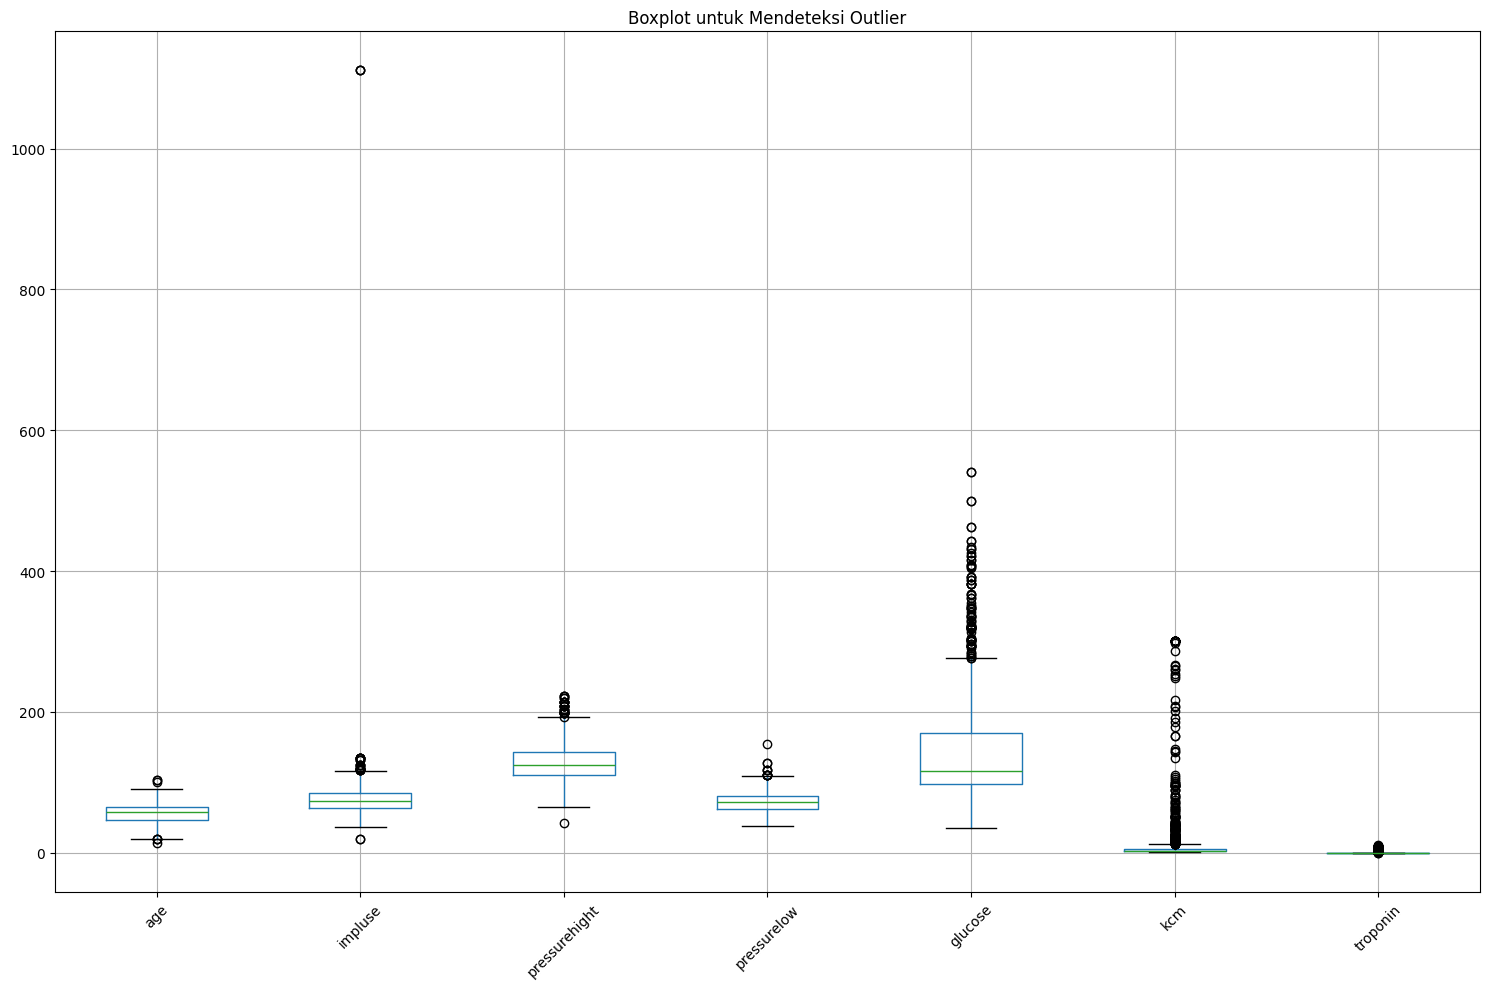

Jumlah baris sebelum menghapus outlier: 1319
Jumlah baris setelah menghapus outlier: 789
Persentase data yang dihapus: 40.18%

Statistik deskriptif sebelum menghapus outlier:
               age      impluse  pressurehight  pressurelow      glucose  \
count  1319.000000  1319.000000    1319.000000  1319.000000  1319.000000   
mean     56.191812    78.336619     127.170584    72.269143   146.634344   
std      13.647315    51.630270      26.122720    14.033924    74.923045   
min      14.000000    20.000000      42.000000    38.000000    35.000000   
25%      47.000000    64.000000     110.000000    62.000000    98.000000   
50%      58.000000    74.000000     124.000000    72.000000   116.000000   
75%      65.000000    85.000000     143.000000    81.000000   169.500000   
max     103.000000  1111.000000     223.000000   154.000000   541.000000   

               kcm     troponin  
count  1319.000000  1319.000000  
mean     15.274306     0.360942  
std      46.327083     1.154568  
min 

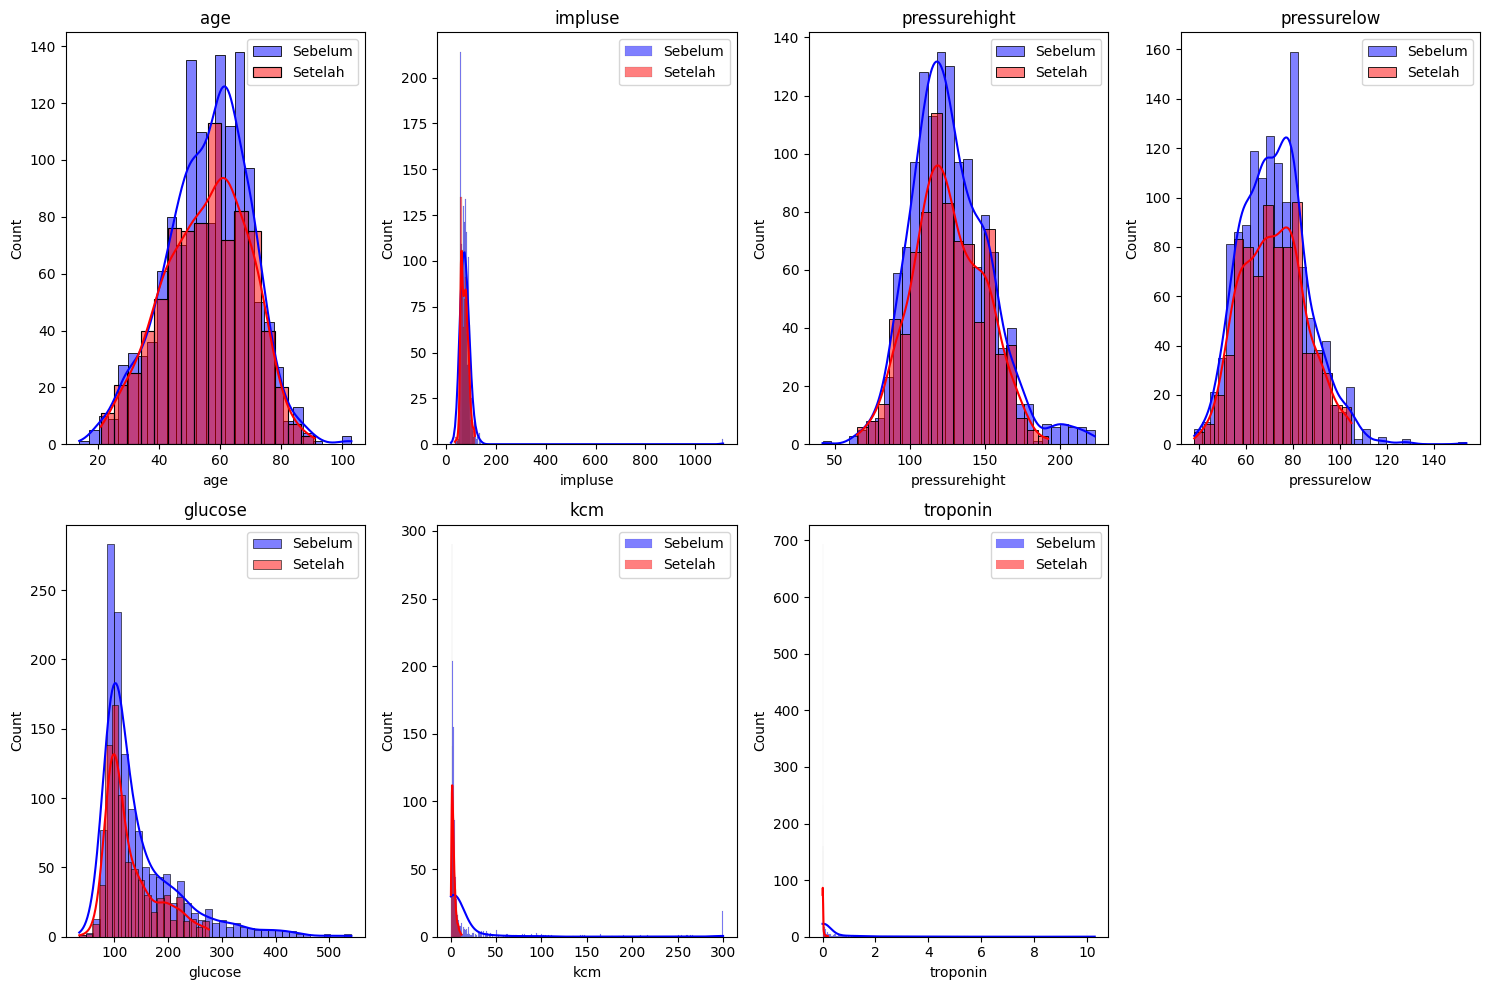

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memeriksa missing values
print(data.isnull().sum())

# Fungsi remove_outliers dengan sedikit modifikasi
def remove_outliers(df, columns):
    df_clean = df.copy()
    removed_rows = []
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Simpan baris yang akan dihapus
        outlier_rows = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)].index
        removed_rows.extend(outlier_rows)

    # Hapus baris outlier
    df_clean = df_clean.drop(index=list(set(removed_rows)))
    return df_clean

# Kolom numerik yang akan diperiksa untuk outlier (kecuali gender)
numeric_columns = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

# Visualisasi boxplot untuk melihat outlier
plt.figure(figsize=(15, 10))
data[numeric_columns].boxplot()
plt.title('Boxplot untuk Mendeteksi Outlier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan jumlah baris sebelum menghapus outlier
print(f"Jumlah baris sebelum menghapus outlier: {len(data)}")

# Menghapus outlier
data_clean = remove_outliers(data, numeric_columns)

# Menampilkan jumlah baris setelah menghapus outlier
print(f"Jumlah baris setelah menghapus outlier: {len(data_clean)}")

# Menampilkan persentase data yang dihapus
percent_removed = ((len(data) - len(data_clean)) / len(data)) * 100
print(f"Persentase data yang dihapus: {percent_removed:.2f}%")

# Menampilkan statistik deskriptif sebelum dan sesudah penghapusan outlier
print("\nStatistik deskriptif sebelum menghapus outlier:")
print(data[numeric_columns].describe())
print("\nStatistik deskriptif setelah menghapus outlier:")
print(data_clean[numeric_columns].describe())

# Optional: Visualisasi distribusi data sebelum dan sesudah
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[col], kde=True, color='blue', alpha=0.5, label='Sebelum')
    sns.histplot(data_clean[col], kde=True, color='red', alpha=0.5, label='Setelah')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

tidak ada missing values pada data ini serta ada beberpa data yang termasuk outlier, maka dari itu dihapuskan terlebih dahulu data outlier

#EDA

Nilai unik di kolom class: ['negative' 'positive']


<ipython-input-6-586858f062dc>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean['class'] = data_clean['class'].replace({'positive': 1, 'negative': 0})


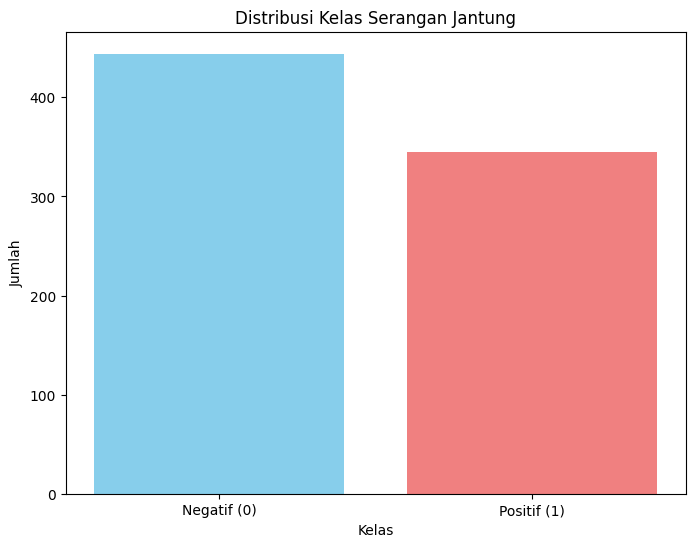

In [6]:
# **1. Encoding Label Target dan Distribusi Kelas**
print("Nilai unik di kolom class:", data_clean['class'].unique())

# Encoding
data_clean['class'] = data_clean['class'].replace({'positive': 1, 'negative': 0})

# Distribusi Kelas
plt.figure(figsize=(8,6))
class_counts = data_clean['class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'lightcoral'])
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Distribusi Kelas Serangan Jantung')
plt.xticks([0, 1], ['Negatif (0)', 'Positif (1)'])
plt.show()

terlihat dalam grafik tersebut dataset tidak seimbang, data negatif berjumlah sekitar 400 dan data positif berjumlah sekitar 300, maka perlunya metode untuk menyeimbangkan data

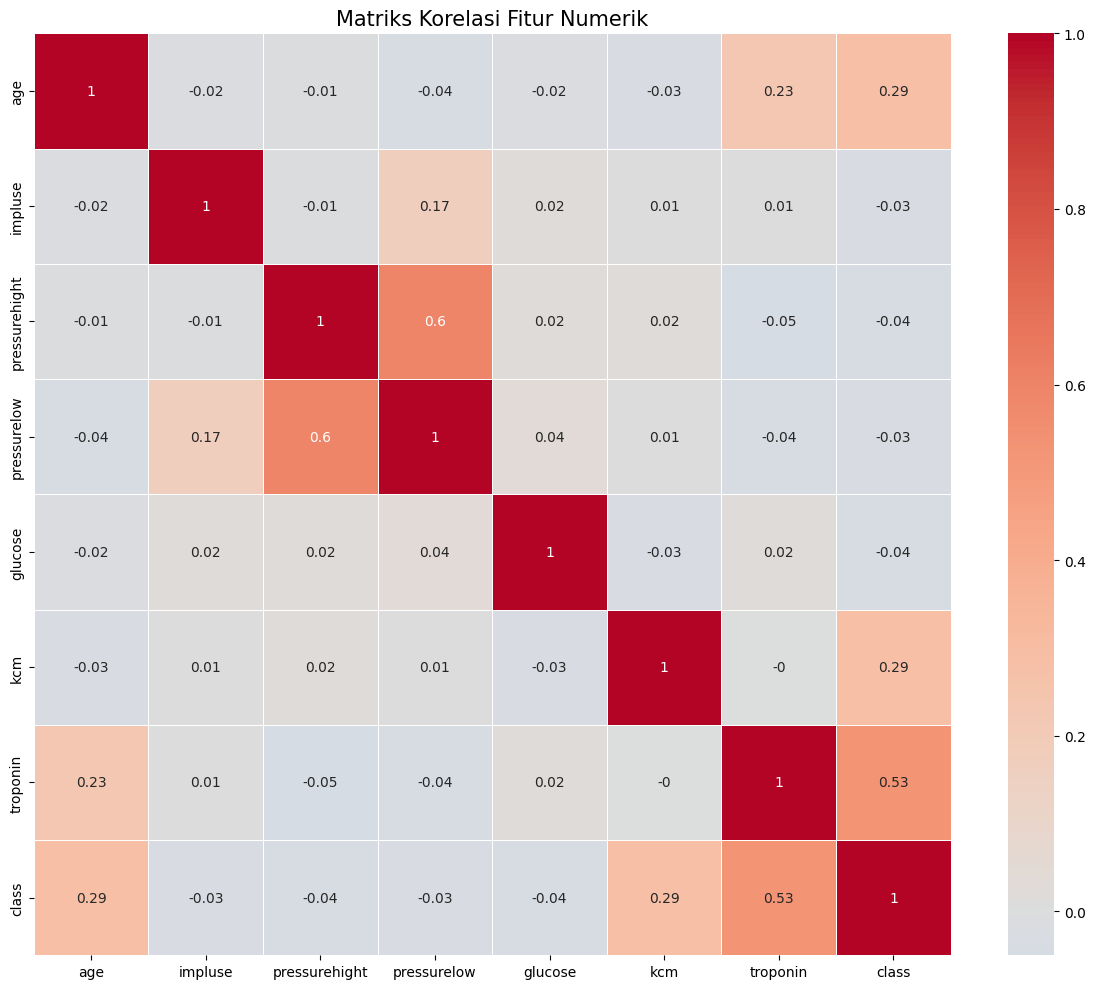

In [7]:
# **2. Matriks Korelasi**
# Pilih kolom numerik
numeric_columns = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin', 'class']

# Hitung matriks korelasi
correlation_matrix = data_clean[numeric_columns].corr().round(2)

# Visualisasi
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)
plt.title("Matriks Korelasi Fitur Numerik", size=15)
plt.tight_layout()
plt.show()

1. Korelasi antara fitur-fitur:

a. Korelasi ditunjukkan oleh nilai dalam matriks (berkisaran antara -1 hingga 1). Warna merah gelap mewakili korelasi positif tinggi, sementara warna biru muda menunjukkan korelasi negatif atau mendekati nol.

b. Fitur pressureheight dan pressurelow memiliki korelasi tinggi (0.6), menunjukkan bahwa nilai kedua fitur ini cenderung berubah seiring.

c. Fitur troponin memiliki korelasi yang cukup tinggi terhadap class (0.53), menunjukkan hubungan yang cukup kuat.

2. Korelasi dengan target (class):

a. Fitur age (0.29) dan kcm (0.29) memiliki hubungan positif sedang dengan class.

b. Fitur lain, seperti impulse, pressureheight, pressurelow, glucose, memiliki korelasi rendah atau mendekati nol dengan class.

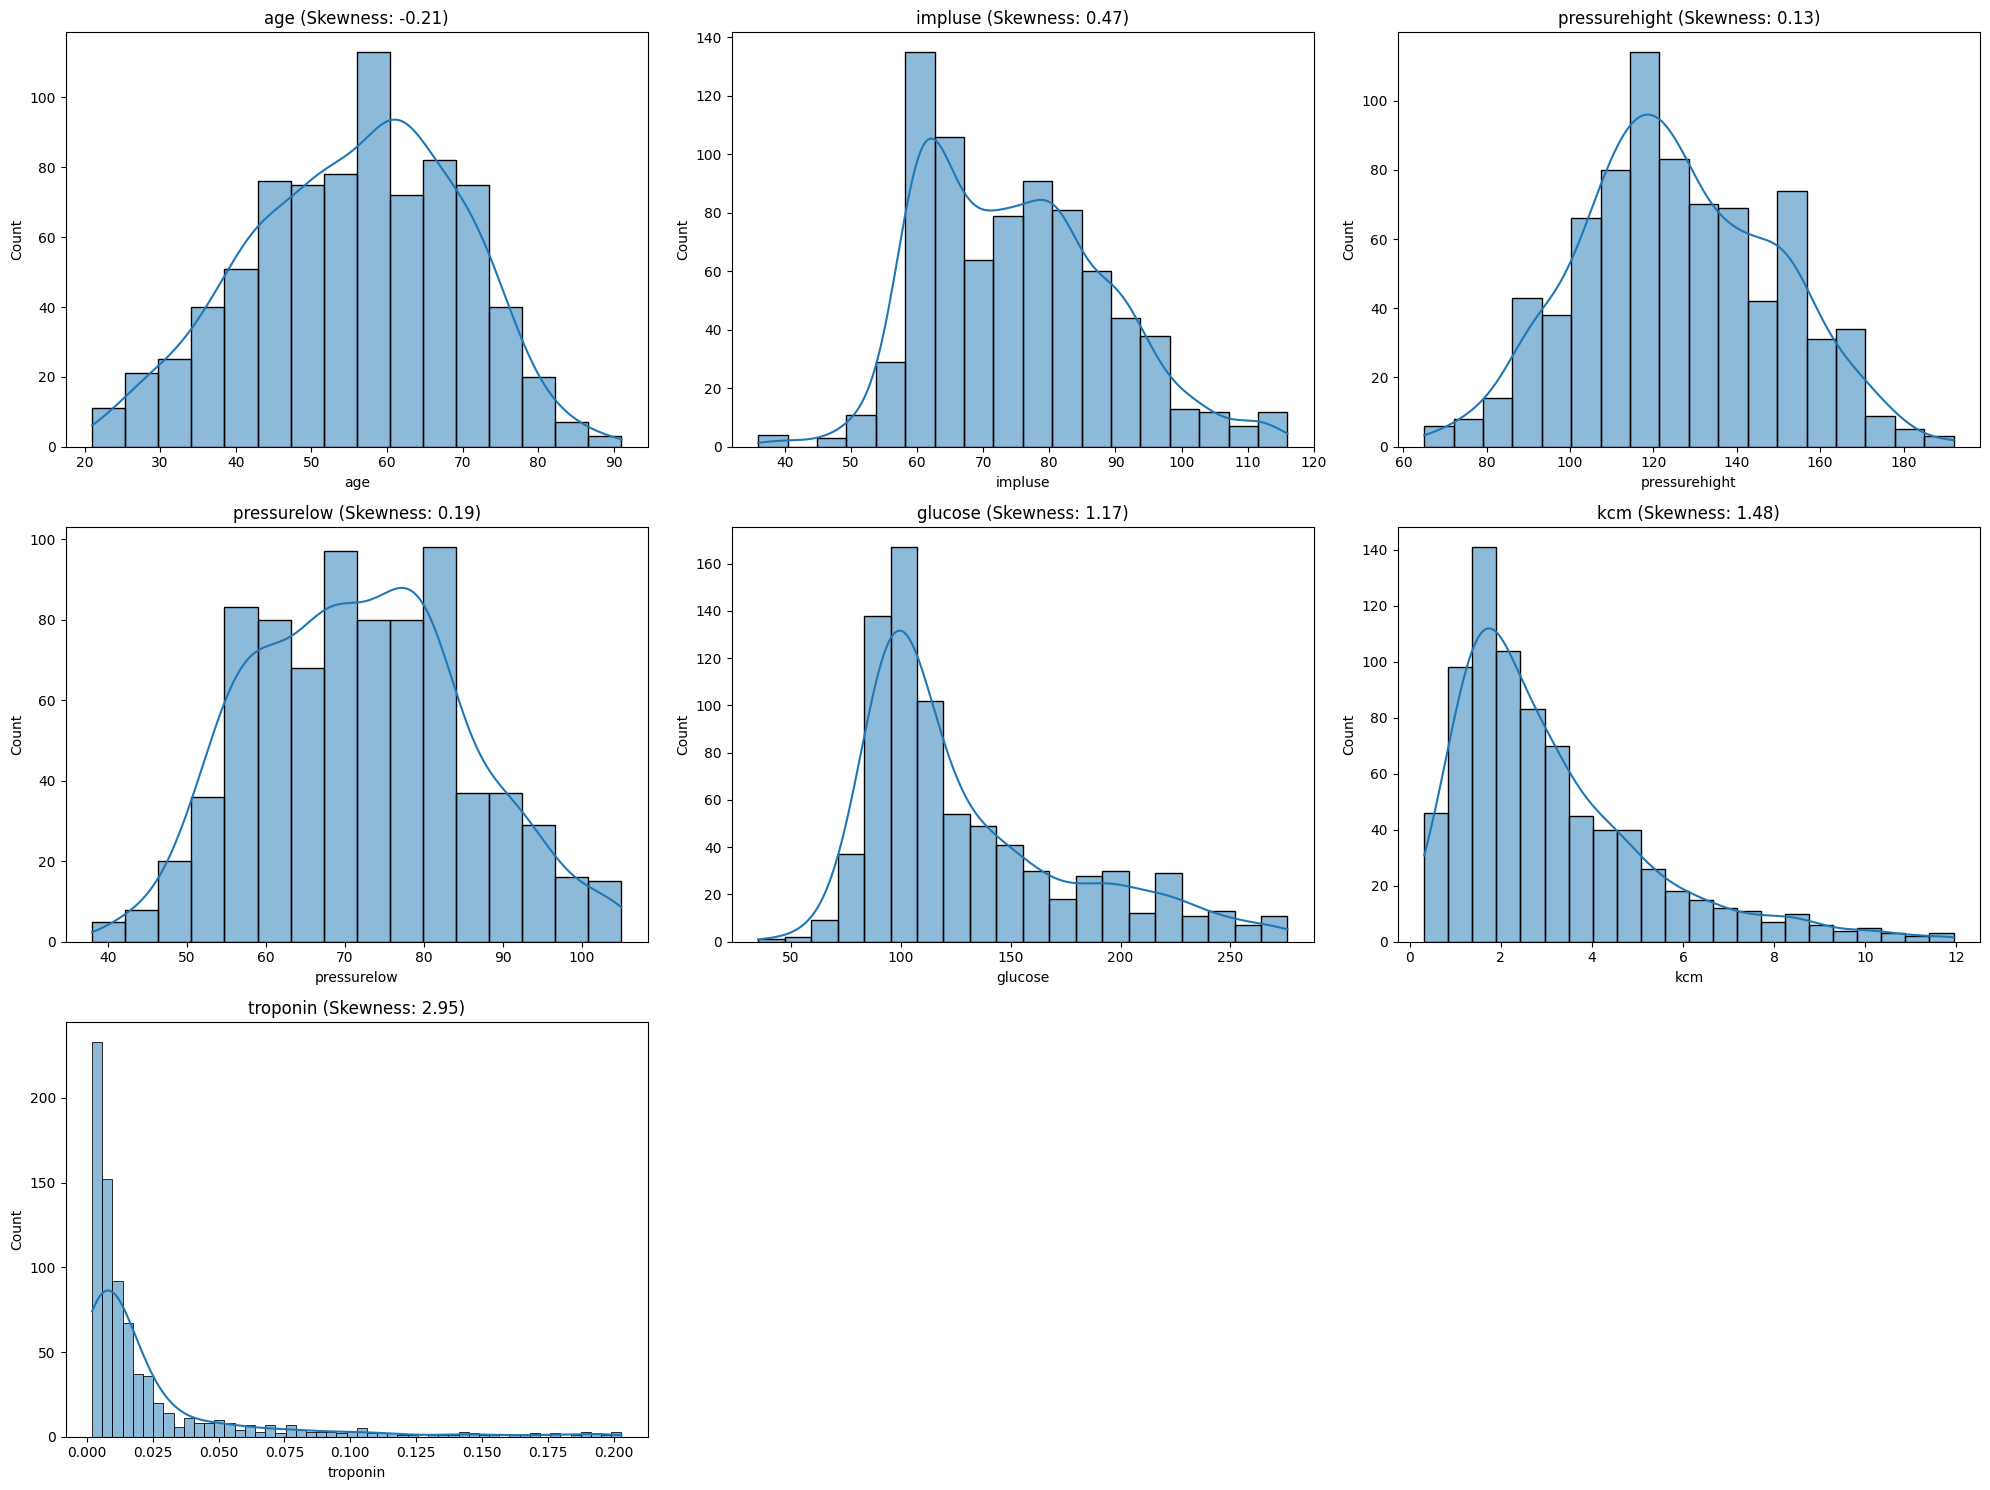

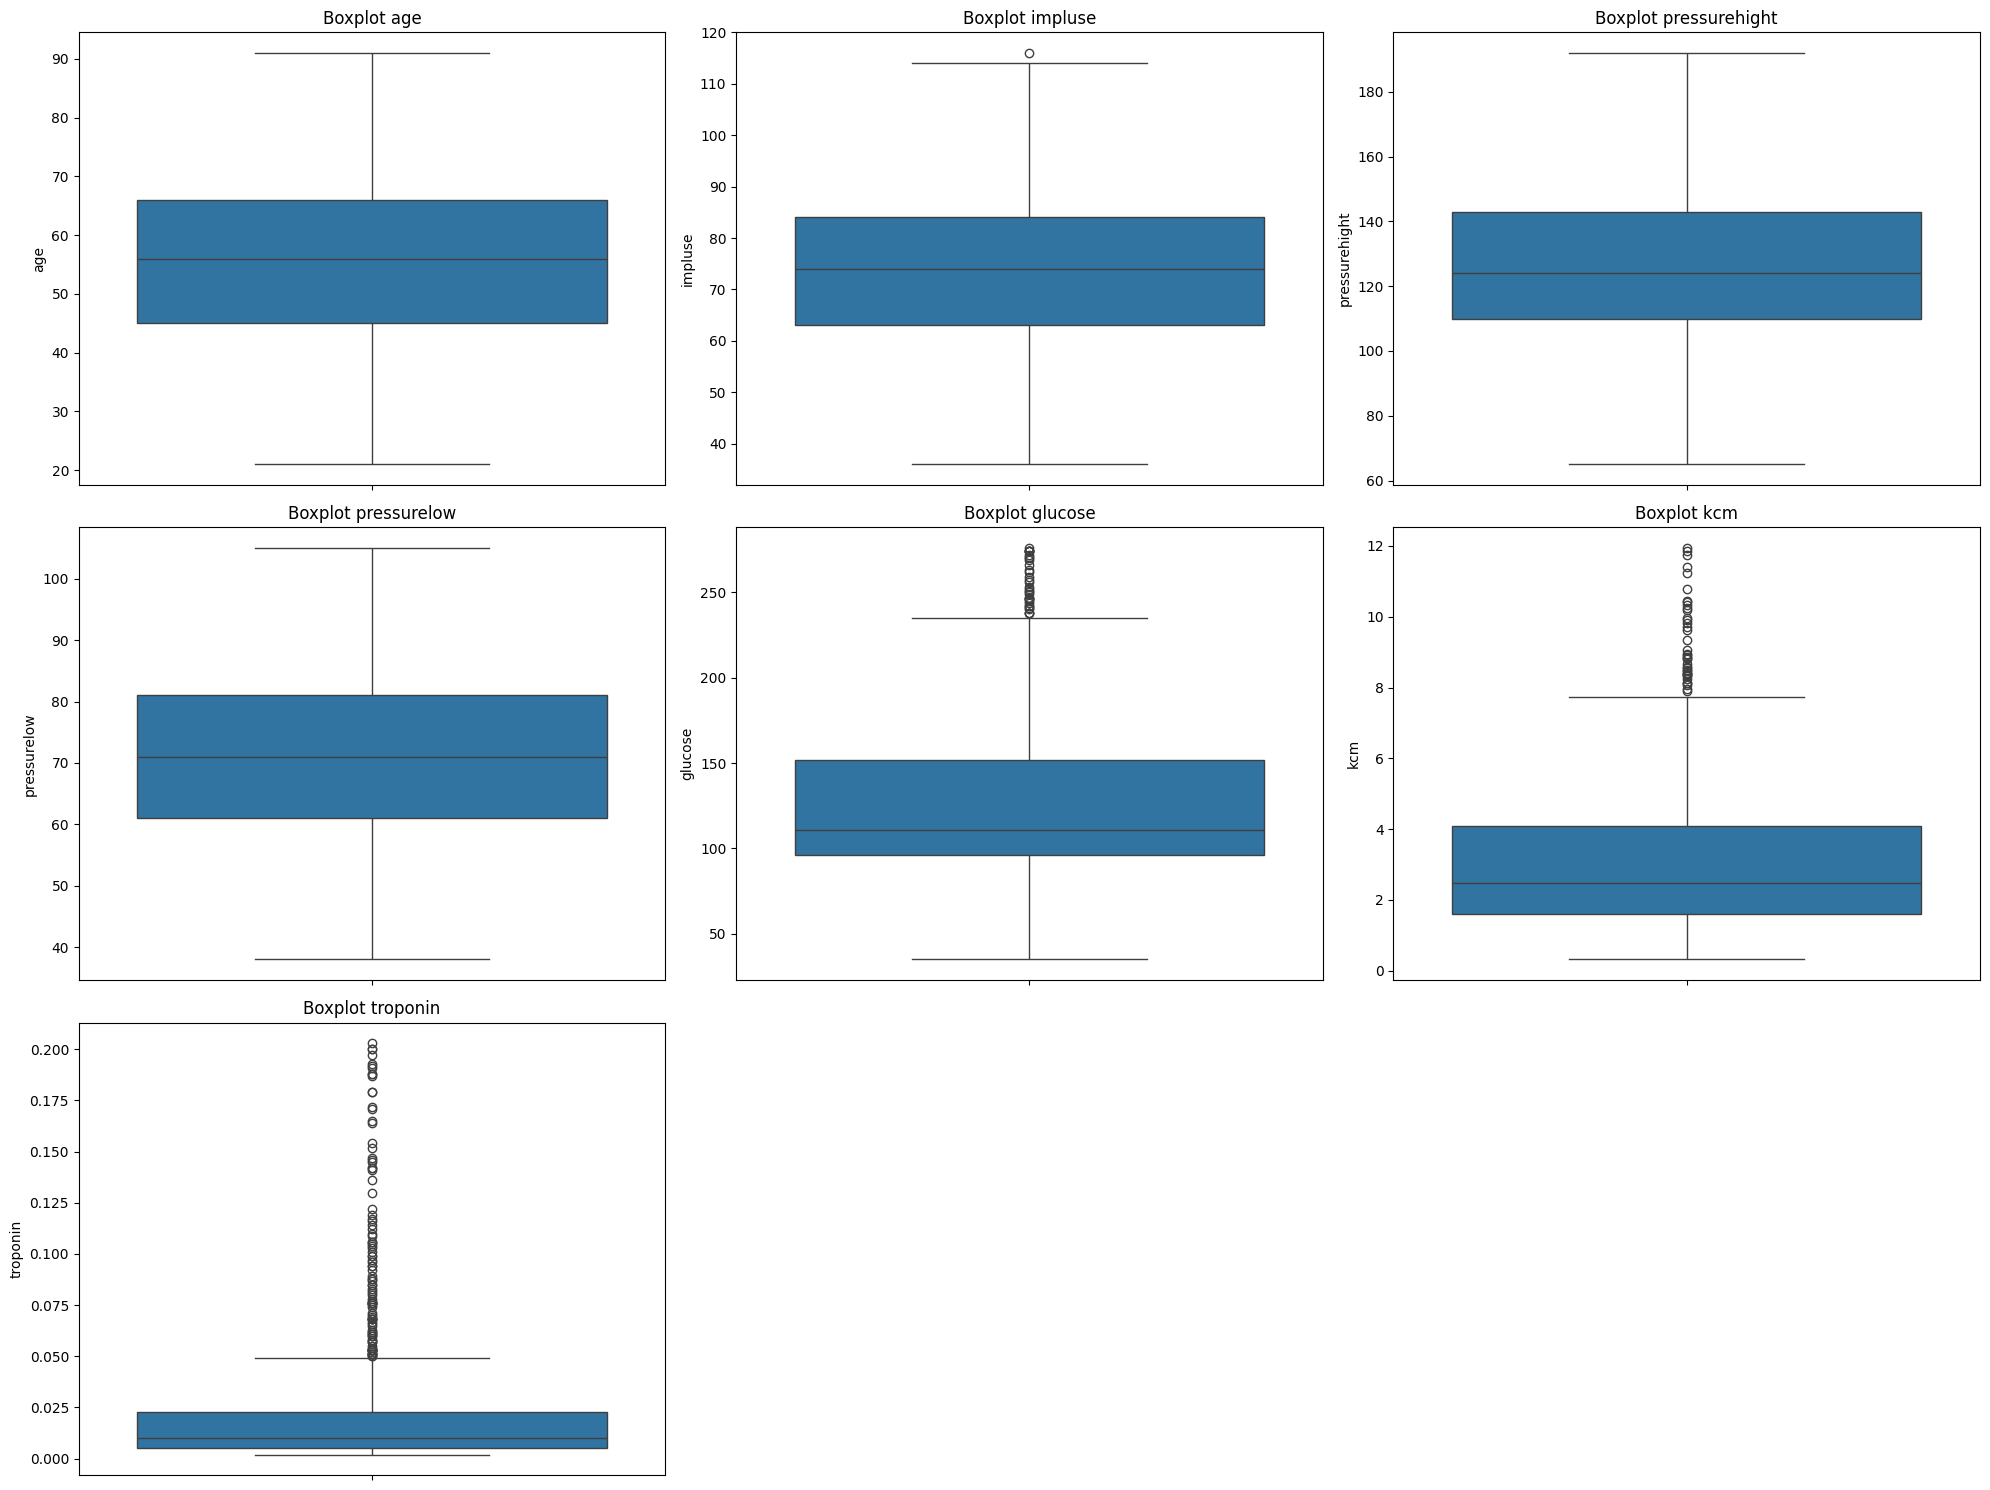


Skewness setiap fitur:
Skewness of age: -0.21
Skewness of impluse: 0.47
Skewness of pressurehight: 0.13
Skewness of pressurelow: 0.19
Skewness of glucose: 1.17
Skewness of kcm: 1.48
Skewness of troponin: 2.95


In [8]:
# **3. Distribusi dan Skewness**
input_columns = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

# Perhitungan Skewness dan Visualisasi
plt.figure(figsize=(20,15))
for i, col in enumerate(input_columns, 1):
    plt.subplot(3,3,i)

    # Histogram dengan KDE
    sns.histplot(data_clean[col], kde=True)

    # Hitung Skewness
    skewness = data_clean[col].skew()
    plt.title(f'{col} (Skewness: {skewness:.2f})')

plt.tight_layout()
plt.show()

# **4. Boxplot dan Distribusi**
plt.figure(figsize=(20,15))
for i, col in enumerate(input_columns, 1):
    plt.subplot(3,3,i)

    # Boxplot
    sns.boxplot(y=data_clean[col])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

# Cetak Skewness
print("\nSkewness setiap fitur:")
for col in input_columns:
    skewness = data_clean[col].skew()
    print(f'Skewness of {col}: {skewness:.2f}')

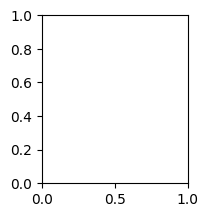

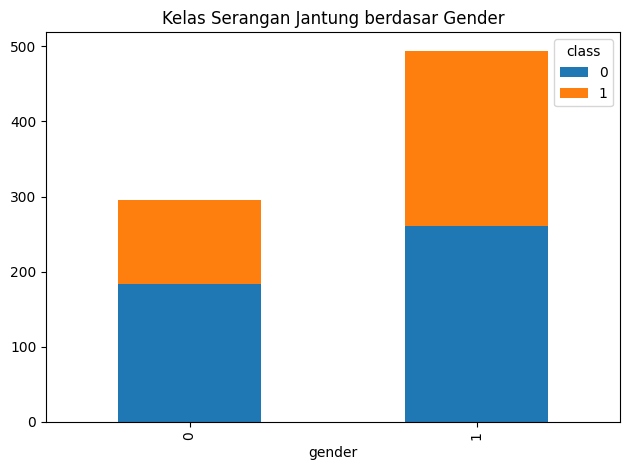

In [9]:
# 5. Perbandingan Gender dan Kelas
plt.subplot(2,3,5)
data_clean.groupby(['gender', 'class']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Kelas Serangan Jantung berdasar Gender')

plt.tight_layout()
plt.show()

Kode kategori gender (0 untuk perempuan, 1 untuk laki-laki).
1. Gender 1 cenderung lebih sering muncul di dataset dan memiliki kasus serangan jantung (kelas 1) yang lebih banyak dibandingkan Gender 0.

2. Data ini menunjukkan pola bahwa kelompok Gender 1 mungkin lebih rentan terhadap serangan jantung, meskipun analisis lebih lanjut diperlukan untuk memahami penyebabnya.

#Featture Engineering

In [10]:
# Mendefinisikan feature matrix X dan target variable y
feature = data_clean.drop(columns='class')  # Mengambil seluruh kolom kecuali 'class' sebagai feature matrix
target = data_clean['class']  # Mengambil kolom 'class' sebagai target variable
from sklearn.preprocessing import RobustScaler

# Inisialisasi objek RobustScaler untuk melakukan scaling data
feature_scalar = RobustScaler()

# Melakukan fitting pada data fitur untuk menghitung median dan IQR
feature_scalar.fit(feature)

# Melakukan scaling pada data fitur
scaled_feature = feature_scalar.transform(feature)
# Mengonversi hasil scaling menjadi DataFrame dengan nama kolom yang sesuai
feature = pd.DataFrame(scaled_feature, columns=feature.columns)
# Menampilkan 5 baris pertama dari dataset yang sudah di-scaled
print(feature.head())

        age  gender   impluse  pressurehight  pressurelow   glucose    kcm  \
0  0.380952     0.0 -0.380952       1.090909         0.60  0.875000 -0.276   
1 -0.047619     0.0 -0.476190       1.090909         0.30  2.839286 -0.200   
2  0.095238    -1.0 -0.619048      -0.363636        -0.65 -0.428571 -0.264   
3 -1.142857    -1.0 -1.619048       1.666667        -0.15 -0.160714 -0.712   
4 -0.571429    -1.0 -0.666667       0.909091         0.50  0.428571 -0.056   

   troponin  
0  0.111111  
1 -0.388889  
2 -0.333333  
3 -0.388889  
4 -0.333333  


Kode ini melakukan scaling pada fitur data menggunakan RobustScaler untuk mengurangi pengaruh outlier dengan menghitung median dan IQR, lalu mengonversinya kembali menjadi DataFrame dengan nama kolom yang sama.

In [11]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

membagi data train:test = 80:20

In [12]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling pada data pelatihan
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

melakukan metode oversampling SMOTE untuk menyeimbangkan data

<ipython-input-13-81031571905a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=class_distribution_before, palette='Blues', alpha=0.7)
<ipython-input-13-81031571905a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=class_distribution_after, palette='Oranges', alpha=0.7)


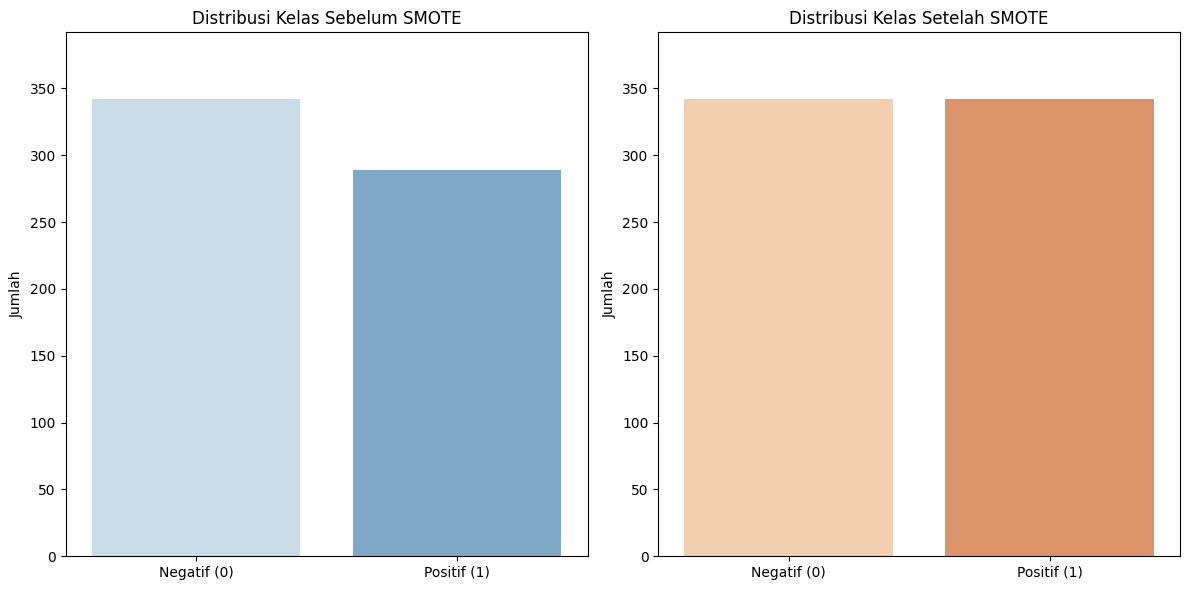

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung distribusi kelas sebelum SMOTE
class_distribution_before = np.bincount(y_train)
class_distribution_after = np.bincount(y_train_resampled)

# Menyiapkan data untuk visualisasi
labels = ['Negatif (0)', 'Positif (1)']
x = np.arange(len(labels))  # posisi pada sumbu x

# Plot
plt.figure(figsize=(12, 6))

# Distribusi kelas sebelum SMOTE
plt.subplot(1, 2, 1)
sns.barplot(x=x, y=class_distribution_before, palette='Blues', alpha=0.7)
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xticks(x, labels)
plt.ylabel('Jumlah')
plt.ylim(0, max(class_distribution_before) + 50)  # Mengatur batas y untuk memberi ruang

# Distribusi kelas setelah SMOTE
plt.subplot(1, 2, 2)
sns.barplot(x=x, y=class_distribution_after, palette='Oranges', alpha=0.7)
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xticks(x, labels)
plt.ylabel('Jumlah')
plt.ylim(0, max(class_distribution_after) + 50)  # Mengatur batas y untuk memberi ruang

# Menampilkan plot
plt.tight_layout()  # Mengatur layout agar tidak ada yang terpotong
plt.show()  # Menampilkan grafik

karena adanya ketidakseimbangan data, maka diperlukan metode untuk menyeimbangkan data. disini menggunakan metode SMOTE untuk menyeimbangkan data

#Modelling

Random Forest - Train Set Accuracy: 1.0000
Random Forest - Test Set Accuracy: 0.9747

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.98      0.95      0.96        56

    accuracy                           0.97       158
   macro avg       0.98      0.97      0.97       158
weighted avg       0.97      0.97      0.97       158



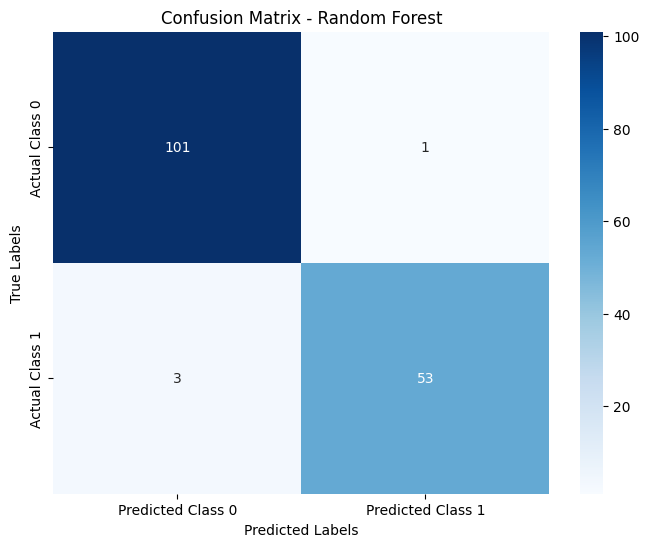

In [14]:
# Menginisialisasi list untuk menyimpan akurasi model
accuracy_scores = []

### Membangun Model Random Forest
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train_resampled, y_train_resampled)

# Membuat prediksi
y_pred_rf = rf_model.predict(X_test)

# Menghitung akurasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_scores.append(accuracy_rf)

# Menghitung akurasi pada data pelatihan
y_train_pred_rf = rf_model.predict(X_train_resampled)
train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)

# Menampilkan hasil Random Forest
print(f"Random Forest - Train Set Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest - Test Set Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Membuat confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Membuat plot confusion matrix untuk Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Class 0", "Predicted Class 1"],
            yticklabels=["Actual Class 0", "Actual Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest")
plt.show()

membangun model random forest dengan parameter parameter n_estimators=100, random_state=42

dan meraih hasil akurasi

Random Forest - Train Set Accuracy: 1.0000

Random Forest - Test Set Accuracy: 0.9747

SVM - Train Set Accuracy: 0.9225
SVM - Test Set Accuracy: 0.9304

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.89      0.91      0.90        56

    accuracy                           0.93       158
   macro avg       0.92      0.93      0.92       158
weighted avg       0.93      0.93      0.93       158



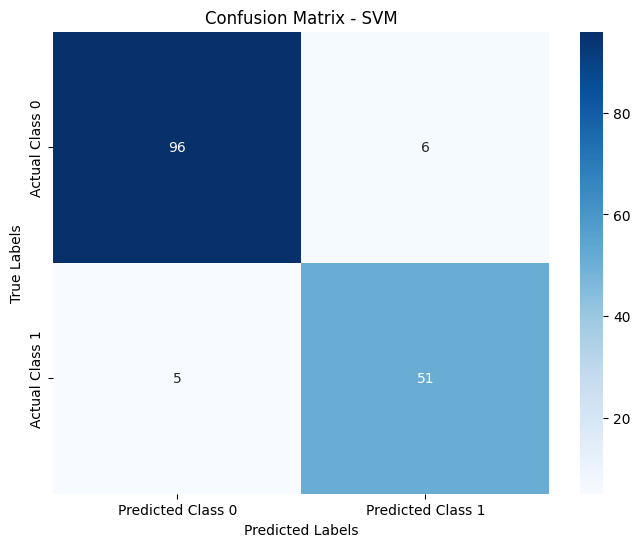

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [15]:
### Membangun Model SVM
# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1)

# Melatih model
svm_model.fit(X_train_resampled, y_train_resampled)

# Membuat prediksi
y_pred_svm = svm_model.predict(X_test)

# Menghitung akurasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_scores.append(accuracy_svm)

# Menghitung akurasi pada data pelatihan
y_train_pred_svm = svm_model.predict(X_train_resampled)
train_accuracy_svm = accuracy_score(y_train_resampled, y_train_pred_svm)

# Menampilkan hasil SVM
print(f"SVM - Train Set Accuracy: {train_accuracy_svm:.4f}")
print(f"SVM - Test Set Accuracy: {accuracy_svm:.4f}")
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Membuat confusion matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Membuat plot confusion matrix untuk SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Class 0", "Predicted Class 1"],
            yticklabels=["Actual Class 0", "Actual Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM")
plt.show()

### Visualisasi Perbandingan Akurasi Model
models = ["Random Forest", "SVM"]

plt

membangun model SVM dengan parameter kernel = 'linear' dan C=1

dan meraih hasil akurasi

SVM - Train Set Accuracy: 0.9225

SVM - Test Set Accuracy: 0.9304